# Chicago Car Crash Dataset

* Student name: Bonny Nichol
* Student pace: Self Paced
* Scheduled project review date/time: November 17, 2020
* Instructor name: Jeff Herman
* Blog post URL:


## Import Libraries

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import xgboost as xgb

/Users/rosegold/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data

In [2]:
# load dataset
df = pd.read_csv('crashes.csv')
df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,073682ef84ff827659552d4254ad1b98bfec24935cc9cc...,JB460108,NaN,10/02/2018 06:30:00 PM,10,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,18,3,10,NaN,NaN,NaN
1,1560fb8a1e32b528fef8bfd677d2b3fc5ab37278b157fa...,JC325941,NaN,06/27/2019 04:00:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,16,5,6,NaN,NaN,NaN
2,c7e667807d86ff2e83da48267e1135680cad68c86eb00f...,JD150617,NaN,02/13/2020 04:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,1.0,2.0,0.0,16,5,2,NaN,NaN,NaN
3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,NaN,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,0.0,0.0,2.0,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)


## Data Exploration

In [3]:
# Shape of dataset
df.shape

(453873, 49)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453873 entries, 0 to 453872
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                453873 non-null  object 
 1   RD_NO                          450376 non-null  object 
 2   CRASH_DATE_EST_I               33749 non-null   object 
 3   CRASH_DATE                     453873 non-null  object 
 4   POSTED_SPEED_LIMIT             453873 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         453873 non-null  object 
 6   DEVICE_CONDITION               453873 non-null  object 
 7   WEATHER_CONDITION              453873 non-null  object 
 8   LIGHTING_CONDITION             453873 non-null  object 
 9   FIRST_CRASH_TYPE               453873 non-null  object 
 10  TRAFFICWAY_TYPE                453873 non-null  object 
 11  LANE_CNT                       198959 non-null  float64
 12  ALIGNMENT                     

In [5]:
#A heatmap of the missing values visually shows the data that is missing
#sns.heatmap(df.isnull())
#plt.show()

In [6]:
df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [7]:
df.fillna('UNKNOWN', inplace=True)

In [8]:
crashdata = df.drop(['DATE_POLICE_NOTIFIED','POSTED_SPEED_LIMIT','CRASH_DATE','RD_NO','CRASH_RECORD_ID','CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I', 
                     'NOT_RIGHT_OF_WAY_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE',
        'WORKERS_PRESENT_I', 'INJURIES_UNKNOWN'], axis=1)
crashdata.columns

Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5caba93c8>,
      dtype=object)

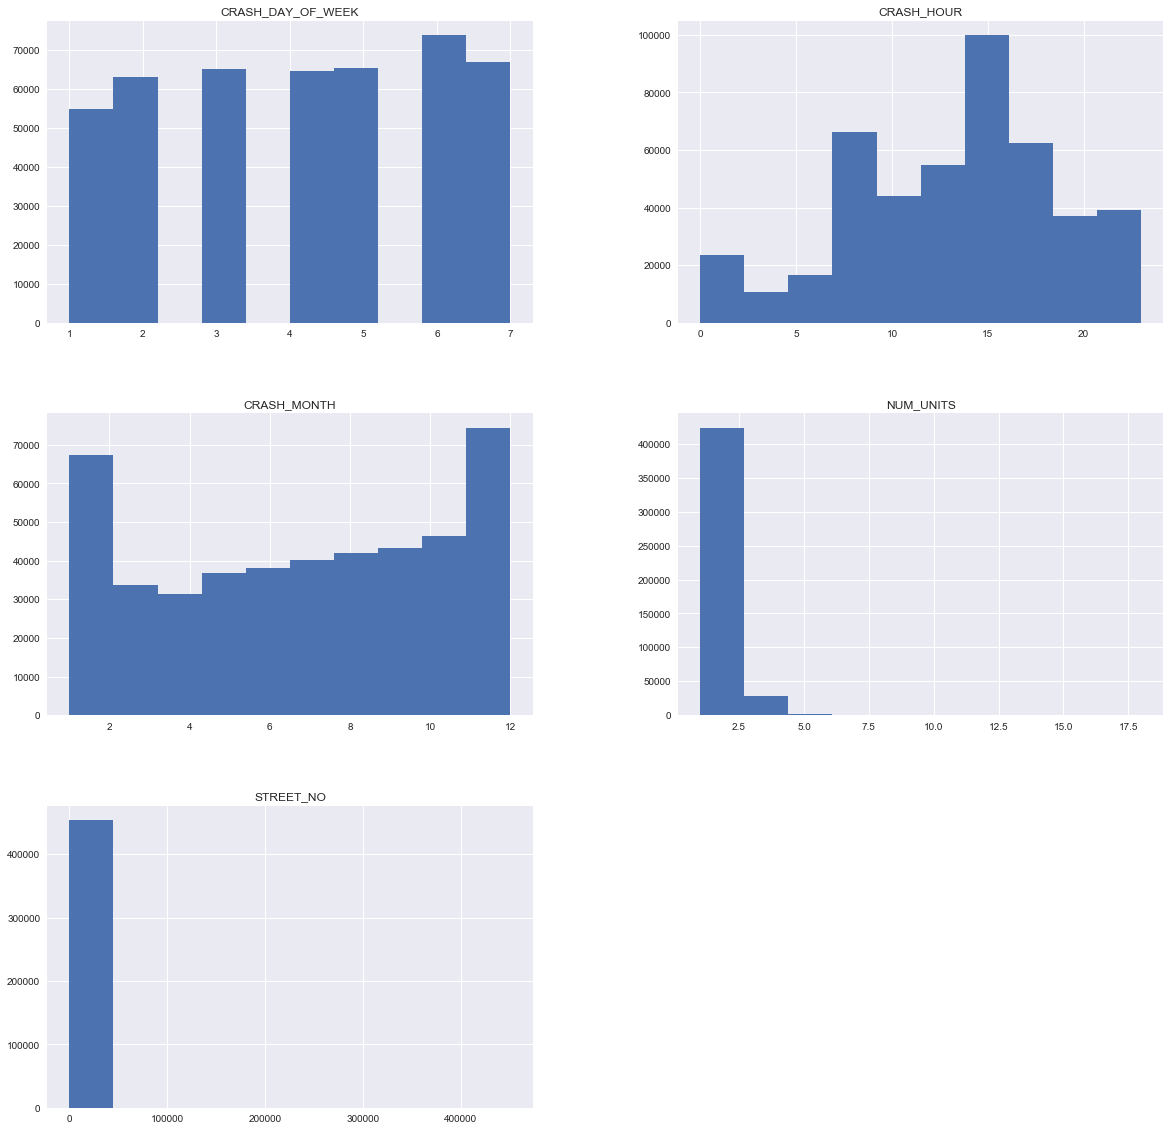

In [9]:
crashdata.hist(bins=10, figsize=(20,20))

In [10]:
crashdata['INJURIES_FATAL'].value_counts()

0.0        452545
UNKNOWN       892
1.0           405
2.0            25
3.0             5
4.0             1
Name: INJURIES_FATAL, dtype: int64

## Plotting Geographical Data

In [11]:
crashdata = crashdata[crashdata['LATITUDE'] != 'UNKNOWN']
crashdata = crashdata[crashdata['LONGITUDE'] != 'UNKNOWN']
#crashdata = crashdata.reset_index()
crashdata



,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
3,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,...,0,0,0,3,16,6,6,41.7418,-87.741,POINT (-87.740953581987 41.741803598989)
4,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,...,0,0,0,2,22,5,3,41.7418,-87.741,POINT (-87.740953581987 41.741803598989)
5,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,0,0,0,2,14,2,3,41.9536,-87.7321,POINT (-87.732081736006 41.953646899951)
6,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NOT ON SCENE (DESK REPORT),...,0,0,0,2,17,5,8,41.9038,-87.6433,POINT (-87.643286359995 41.903825233976)
7,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,0,0,0,3,8,3,6,41.7948,-87.6238,POINT (-87.623828038036 41.794778764028)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453868,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,0,0,0,2,9,3,7,41.7563,-87.6382,POINT (-87.638171744432 41.756286066779)
453869,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,...,2,0,0,1,17,4,7,41.8066,-87.6651,POINT (-87.665063325617 41.806632597822)
453870,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,HEAD ON,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,...,0,0,0,2,10,4,7,41.8102,-87.6941,POINT (-87.694115553767 41.810176795619)
453871,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,...,0,0,0,1,14,4,7,41.8057,-87.6098,POINT (-87.609784032292 41.805736682295)


In [12]:
neigh_map = gpd.read_file('geo_export_aeab7300-7d09-4aec-ad13-b05f99ccc606.shp')
crs = {'init': 'epsg:4326'}

In [13]:
geometry = [Point(xy) for xy in zip(crashdata['LONGITUDE'], crashdata['LATITUDE'])]
geometry[5:8]
geo_df = gpd.GeoDataFrame(crashdata, crs = crs, geometry = geometry)
geo_data = geo_df.dropna()
geo_data = geo_data[geo_data.LATITUDE > 0]

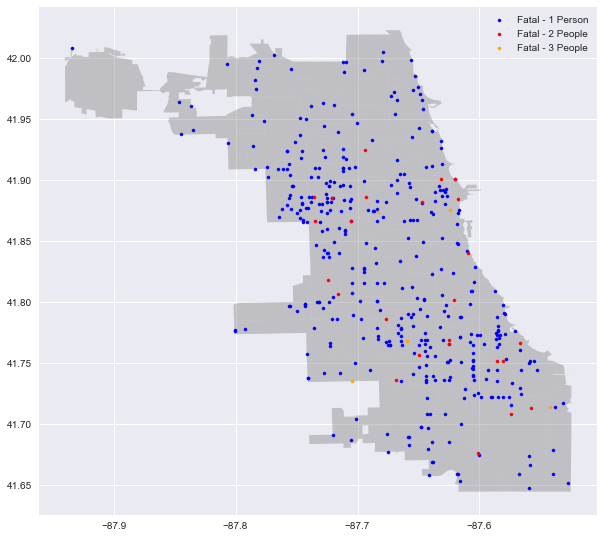

In [14]:
#Plotting fatal injuries
fig, ax = plt.subplots(figsize = (10,10))
neigh_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_data[geo_data['INJURIES_FATAL'] == 1.0].plot(ax = ax, markersize = 10, color='blue', marker='o', label = 'Fatal - 1 Person')
geo_data[geo_data['INJURIES_FATAL'] == 2.0].plot(ax = ax, markersize = 10, color='red', marker='o', label = 'Fatal - 2 People')
geo_data[geo_data['INJURIES_FATAL'] == 3.0].plot(ax = ax, markersize = 10, color='orange', marker='o', label = 'Fatal - 3 People')
plt.legend(prop={'size': 10})

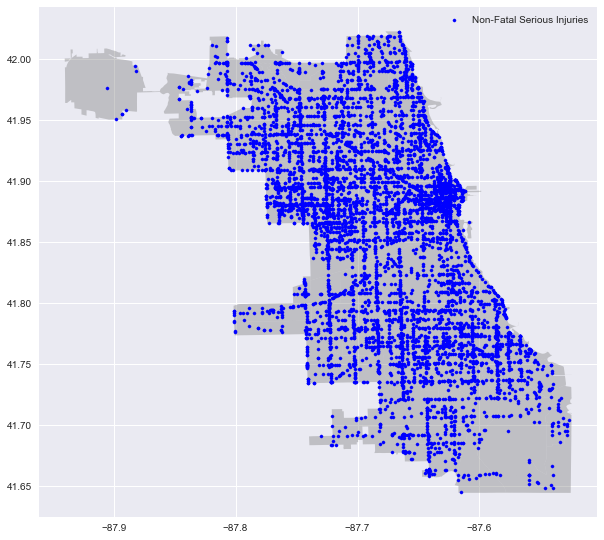

In [15]:
#Plotting non-fatal but serious injuries
fig, ax = plt.subplots(figsize = (10,10))
neigh_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_data[geo_data['INJURIES_INCAPACITATING'] == 1.0].plot(ax = ax, markersize = 10, color='blue', marker='o', label = 'Non-Fatal Serious Injuries')
plt.legend(prop={'size': 10})

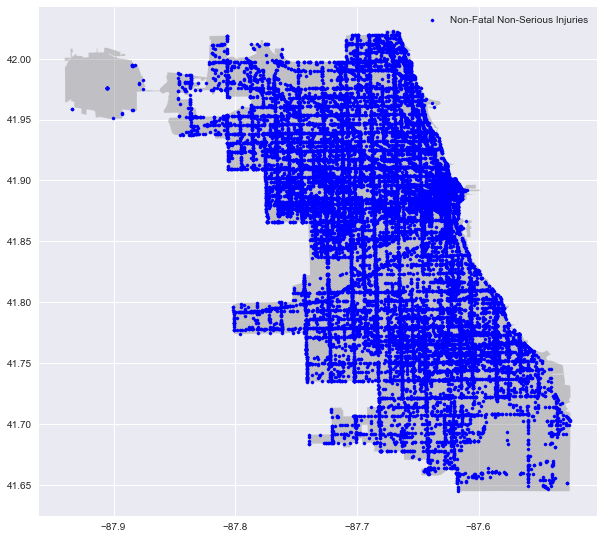

In [16]:
#Plotting non-fatal and non-serious injuries
fig, ax = plt.subplots(figsize = (10,10))
neigh_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_data[geo_data['INJURIES_NON_INCAPACITATING'] == 1.0].plot(ax = ax, markersize = 10, color='blue', marker='o', label = 'Non-Fatal Non-Serious Injuries')
plt.legend(prop={'size': 10})

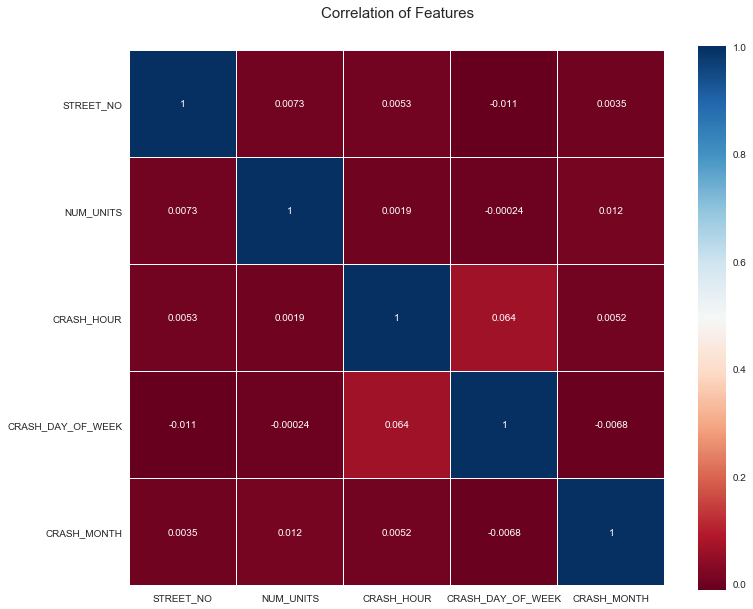

In [18]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,10))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(crashdata.corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)
plt.show()

In [19]:
fatal = crashdata[crashdata['INJURIES_FATAL'] != 'UNKNOWN']
#fatal = crashdata[crashdata['WEATHER_CONDITION'] != 'UNKNOWN']
#fatal = crashdata[crashdata['LIGHTING_CONDITION'] != 'UNKNOWN']
fatal = fatal.reset_index()

In [20]:
fatal['WEATHER_CONDITION'].value_counts()

CLEAR                       358008
RAIN                         40752
UNKNOWN                      19353
SNOW                         15639
CLOUDY/OVERCAST              13379
OTHER                         1383
FOG/SMOKE/HAZE                 794
SLEET/HAIL                     651
FREEZING RAIN/DRIZZLE          421
SEVERE CROSS WIND GATE          81
BLOWING SNOW                    61
BLOWING SAND, SOIL, DIRT         2
Name: WEATHER_CONDITION, dtype: int64

In [21]:
fatal['LIGHTING_CONDITION'].value_counts()

DAYLIGHT                  295350
DARKNESS, LIGHTED ROAD     94692
DARKNESS                   22663
UNKNOWN                    16246
DUSK                       13822
DAWN                        7751
Name: LIGHTING_CONDITION, dtype: int64

In [22]:
fatal['INJURIES_FATAL'].value_counts()

0.0    450092
1.0       401
2.0        25
3.0         5
4.0         1
Name: INJURIES_FATAL, dtype: int64

## One Hot Encoding

In [23]:
ohe = OneHotEncoder(handle_unknown='ignore')

crash_fatal = fatal['INJURIES_FATAL']
crash_df = pd.DataFrame(crash_fatal, columns=['INJURIES_FATAL'])
crash_df = pd.DataFrame(ohe.fit_transform(crash_df[['INJURIES_FATAL']]).toarray())

In [24]:
crash_col = fatal['INJURIES_FATAL'].unique()
fatal.columns = crash_col
fatal.columns

Float64Index([0.0, 1.0, 2.0, 4.0, 3.0], dtype='float64')

## Label Encoding Features

In [25]:
text_col = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION','LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 
            'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'CRASH_HOUR','CRASH_DAY_OF_WEEK', 'CRASH_MONTH']
encode_df = pd.DataFrame()
for col in text_col:
    encoder = LabelEncoder()
    encode_df[col] = encoder.fit_transform(df[col])
    
encode_df

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,4,3,2,0,7,11,0,18,2,9
1,4,3,2,3,15,10,0,16,4,5
2,4,3,2,3,15,10,6,16,4,1
3,15,1,2,3,17,8,0,16,5,5
4,16,1,2,1,17,8,0,22,4,2
...,...,...,...,...,...,...,...,...,...,...
453868,15,1,2,3,17,2,0,9,2,6
453869,4,3,3,3,17,3,0,17,3,6
453870,15,1,2,3,3,2,0,10,3,6
453871,4,3,2,3,7,10,0,14,3,6


In [27]:
# Merge the two dataframes together
#df2 = pd.merge(crash_df, encode_df, left_index=True, right_index=True)

In [28]:
df2.columns

Index([                     0.0,                      1.0,
                            2.0,                      4.0,
                            3.0, 'TRAFFIC_CONTROL_DEVICE',
             'DEVICE_CONDITION',      'WEATHER_CONDITION',
           'LIGHTING_CONDITION',       'FIRST_CRASH_TYPE',
              'TRAFFICWAY_TYPE',   'ROADWAY_SURFACE_COND',
                   'CRASH_HOUR',      'CRASH_DAY_OF_WEEK',
                  'CRASH_MONTH'],
      dtype='object')

In [29]:
df_fatal = 

KeyError: ('1.0', '2.0', '3.0', '4.0')

## Train and Test Split

In [26]:
# Create features and labels
y = df2['INJURIES_FATAL']
X = df2.drop(columns=['REAR END','ANGLE', 'SIDESWIPE SAME DIRECTION', 'PEDESTRIAN',
       'PARKED MOTOR VEHICLE', 'TURNING', 'HEAD ON', 'PEDALCYCLIST',
       'SIDESWIPE OPPOSITE DIRECTION', 'OTHER NONCOLLISION',
       'FIXED OBJECT', 'OTHER OBJECT', 'REAR TO FRONT', 'REAR TO SIDE',
       'REAR TO REAR', 'TRAIN', 'OVERTURNED', 'ANIMAL'], axis=1)
X = one_hot_data
y = fatal['INJURIES_FATAL'].astype('int')
#

# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10)

NameError: name 'one_hot_data' is not defined

## Decision Tree Classifier

In [ ]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train)

In [ ]:
# Make predictions for test data
y_pred = classifier.predict(X_test) 

In [ ]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
# Alternative confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X, y, values_format='.3g')
plt.show()

## Decision Tree Using Entropy

In [ ]:
# Instantiate and fit a DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier_2.fit(X_train, y_train)

In [ ]:
# Plot and show decision tree
plt.figure(figsize=(20,20), dpi=500)
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()